# Libraries

In [21]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Read DataFrame

In [22]:
df = pd.read_csv("processed_data.csv")
df.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,time_signature,popularity,song_name,artist_name,genius_id,lyric,tags,tier,genius_url,released_year
0,0.507,0.394,6,-7.188,0,0.0350,0.5080,0.000,0.0825,0.164,...,4,85,Shot Glass of Tears,Jung Kook,9626003,"Tell me, am I ever gonna feel again? Tell me,...",pop,C,https://genius.com/Jung-kook-shot-glass-of-tea...,2023.0
1,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000,0.1060,0.952,...,4,81,Sucker,Jonas Brothers,4350998,We go together Better than birds of a feather...,pop,D,https://genius.com/Jonas-brothers-sucker-lyrics,2019.0
2,0.759,0.561,0,-5.643,0,0.1310,0.8030,0.121,0.1010,0.491,...,4,82,VISTA AL MAR,Quevedo,8357473,BlueFire Rápido llega' y rápido te vas (Vas) ...,pop,E,https://genius.com/Quevedo-vista-al-mar-lyrics,2022.0


## Data normalization
Sử dụng phương pháp MinMaxScaler() của sklearn nhằm đưa giá trị của các phần tử numeric được train về giá trị 0, 1 giúp tăng độ chính xác.

In [23]:
scaler = MinMaxScaler()

In [24]:
df_normalized = df.copy()
df_normalized = df_normalized.drop(columns=['id'])
df_normalized.iloc[:, :-8] = pd.DataFrame(scaler.fit_transform(df_normalized.iloc[:, :-8]), columns=df_normalized.iloc[:, :-8].columns)

In [25]:
df_normalized

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,time_signature,popularity,song_name,artist_name,genius_id,lyric,tags,tier,genius_url,released_year
0,0.435897,0.387650,0.545455,0.752007,0.0,0.021643,0.513646,0.000000,0.069130,0.161432,...,0.75,0.25,Shot Glass of Tears,Jung Kook,9626003,"Tell me, am I ever gonna feel again? Tell me,...",pop,C,https://genius.com/Jung-kook-shot-glass-of-tea...,2023.0
1,0.844933,0.736977,0.090909,0.830893,0.0,0.063523,0.043168,0.000000,0.096526,0.970234,...,0.75,0.05,Sucker,Jonas Brothers,4350998,We go together Better than birds of a feather...,pop,D,https://genius.com/Jonas-brothers-sucker-lyrics,2019.0
2,0.743590,0.559231,0.000000,0.809416,0.0,0.190568,0.811930,0.122594,0.090697,0.497064,...,0.75,0.10,VISTA AL MAR,Quevedo,8357473,BlueFire Rápido llega' y rápido te vas (Vas) ...,pop,E,https://genius.com/Quevedo-vista-al-mar-lyrics,2022.0
3,0.700855,0.631152,0.363636,0.854860,0.0,0.080767,0.251764,0.000000,0.221264,0.975366,...,0.75,0.10,WANDA,Quevedo,8719683,"O-O-Ovy On The Drums Es usted o nadie, ¿oyó? ...",pop,E,https://genius.com/Quevedo-wanda-lyrics,2023.0
4,0.750916,0.348608,1.000000,0.812649,0.0,0.303185,0.225474,0.000000,0.085218,0.187092,...,0.75,0.30,Don't,Bryson Tiller,579968,"Don't, don't play with her, don't be dishones...",r-b,C,https://genius.com/Bryson-tiller-dont-lyrics,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0.416361,0.694853,0.000000,0.778054,0.0,0.026395,0.213341,0.000007,0.351830,0.415979,...,0.75,0.25,Hymn for the Weekend,Coldplay,2353271,"And said drink from me, drink from me (Oh-ah-...",r-b,C,https://genius.com/Coldplay-hymn-for-the-weeke...,2016.0
1449,0.655678,0.796568,0.454545,0.916952,1.0,0.039592,0.193118,0.000000,0.167638,0.681816,...,0.75,0.30,Happier,Marshmello,3792450,"Lately, I've been, I've been thinking I want ...",pop,D,https://genius.com/Marshmello-and-bastille-hap...,2018.0
1450,0.954823,0.452379,1.000000,0.661638,0.0,0.055253,0.017485,0.044174,0.021217,0.900439,...,0.75,0.05,Billie Jean,Michael Jackson,1644,She was more like a beauty queen from a movie...,pop,C,https://genius.com/Michael-jackson-billie-jean...,1982.0
1451,0.175824,0.641426,1.000000,0.672934,1.0,0.011262,0.016474,0.222898,0.103521,0.225069,...,0.75,0.10,November Rain,Guns N' Roses,84547,When I look into your eyes I can see a love r...,rock,D,https://genius.com/Guns-n-roses-november-rain-...,1991.0


# Train/Test Split
Train/Test Split là một công cụ giúp phân chia data thành các tập train, test và validation, có tác dụng kiểm thử và train model.<br>
Tỉ lệ phân chia: Train/valid/test = 6/2/2

In [32]:
data = df_normalized.iloc[:, :-8]
label = df_normalized.tags

In [33]:
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=0.2, random_state=42)

In [35]:
X_train, X_val, y_train, y_val = train_test_split(data_train, label_train, test_size=0.4, random_state=42)

# DATA distribution
Tỉ lệ phân bố các genres trong data, ở đây có hiện tượng imblance data do khó khăn trong việc sử dụng API (Kinh phí).<br>
* Pop gernes chiếm tỉ lệ lớn trong data.
* Rap và Rock chiếm tỉ lệ vừa phải trong data, nhưng vẫn rất lệch so với pop.
* r&b và country là 2 dòng nhạc có ít data nhất

<BarContainer object of 5 artists>

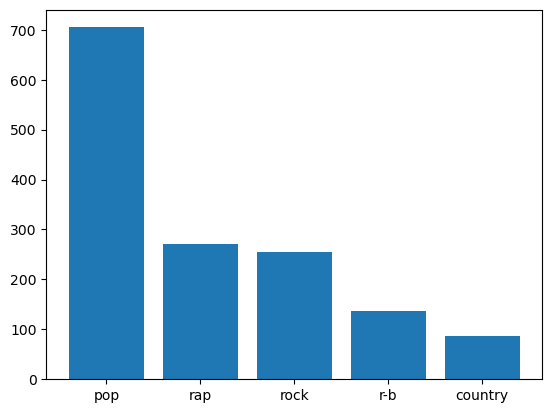

In [36]:
distribution = label.value_counts().to_dict()

x = distribution.keys()
y = distribution.values()

plt.bar(x,y)

# Classifier Definition
Trong phần exploring model này, nhóm em sẽ chọn sử dụng 3 model máy học của sklearn:
* RandomForestClassifier()
* DecisionTreeClassifier()
* Support Vector Machine()

In [37]:
rfc_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()
svm_model = SVC()

## Pure fit
Sử dụng thuần các default-parameters của thư viện sklearn để train thử.

In [38]:
# Pure fit
rfc_model = rfc_model.fit(X_train, y_train)
prediction = rfc_model.predict(X_val)
print(accuracy_score(y_val, prediction))

0.5849462365591398


In [39]:
# Pure fit
dt_model = dt_model.fit(X_train, y_train)
prediction = dt_model.predict(X_val)
print(accuracy_score(y_val, prediction))

0.44731182795698926


In [40]:
# Pure fit
svm_model = svm_model.fit(X_train, y_train)
prediction = svm_model.predict(X_val)
print(accuracy_score(y_val, prediction))

0.556989247311828


## Grid Search CV
GridSearchCV của sklearn là một thư viện hỗ trợ trong việc tìm ra được parameters phù hợp nhất, cho ra accuracy cao nhất ở hiện tại, trả về các thông số train.<br>
Có một hạn chế là GridSearchCV chỉ trả về một model best.

## Param-Grid Design
Tạo ra một param-grid hỗ trợ cho việc chạy của GridSearchCV

In [41]:
rfc_param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# With Pure Data
Xử lí Grid-search-CV trên data thuần, chưa thông qua cân bằng data.
<br>
GridSearchCV có áp dụng đến phương pháp kfold.

In [42]:
rfc_f = GridSearchCV(rfc_model, rfc_param_grid, verbose=2)
dt_f = GridSearchCV(dt_model, dt_param_grid, verbose=2)
svm_f = GridSearchCV(svm_model, svm_param_grid, verbose=2)

## Fit DATA
Tiến hành train data, sử dụng GridSearchCV() trên các model khác nhau.
<br>
Thời gian chạy khá lâu do Param-grid lớn.

### Random Forest Classifier

In [ ]:
rfc_f.fit(X_train, y_train)

In [66]:
best_rfc = rfc_f.best_estimator_
best_rfc

RandomForestClassifier(min_samples_split=5)

In [67]:
rfc_f.best_params_

{'bootstrap': True,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

### Desicion Tree Classifier

In [ ]:
dt_f.fit(X_train, y_train)

In [69]:
best_dt = dt_f.best_estimator_
best_dt

DecisionTreeClassifier(max_depth=5)

In [70]:
dt_f.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

### Sypport Vector Machine Classifier

In [ ]:
svm_f.fit(X_train, y_train)

In [72]:
best_svm = svm_f.best_estimator_
best_svm

SVC(C=1, kernel='poly')

In [73]:
svm_f.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}

### Accuracy
Đánh giá sử dụng metrics Accuracy trên 3 best model

## Best Model
Dùng để giữ lại tham số Best Model để lần sau config nhanh hơn mà không cần phải train.

In [46]:
best_rfc = RandomForestClassifier(bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
best_dt = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=2, min_samples_split=10)
best_svm = SVC(C=1, gamma='scale', kernel='poly')

Train model best:


In [47]:
best_rfc.fit(X_train, y_train)
best_dt.fit(X_train, y_train)
best_svm.fit(X_train, y_train)

SVC(C=1, kernel='poly')

In [48]:
rfc_prediction = best_rfc.predict(X_val)
print(classification_report(y_val, rfc_prediction))

              precision    recall  f1-score   support

     country       1.00      0.15      0.26        27
         pop       0.59      0.86      0.70       228
         r-b       0.00      0.00      0.00        45
         rap       0.58      0.53      0.55        80
        rock       0.65      0.41      0.50        85

    accuracy                           0.60       465
   macro avg       0.56      0.39      0.40       465
weighted avg       0.57      0.60      0.55       465



In [52]:
dt_prediction = best_dt.predict(X_val)
print(classification_report(y_val, dt_prediction))

              precision    recall  f1-score   support

     country       0.00      0.00      0.00        27
         pop       0.53      0.81      0.64       228
         r-b       0.25      0.02      0.04        45
         rap       0.51      0.41      0.46        80
        rock       0.53      0.31      0.39        85

    accuracy                           0.53       465
   macro avg       0.36      0.31      0.31       465
weighted avg       0.47      0.53      0.47       465



In [50]:
svm_prediction = best_svm.predict(X_val)
print(classification_report(y_val, svm_prediction))

              precision    recall  f1-score   support

     country       0.00      0.00      0.00        27
         pop       0.57      0.85      0.68       228
         r-b       0.00      0.00      0.00        45
         rap       0.58      0.44      0.50        80
        rock       0.62      0.45      0.52        85

    accuracy                           0.57       465
   macro avg       0.36      0.35      0.34       465
weighted avg       0.49      0.57      0.52       465



## Model Improvement
Có nhiều phương pháp được sử dụng để cải thiện hiệu năng của Model, trong đó có thể thông qua cách tính toán độ quan trọng của Feature và drop Feature.

### Feature Selection (For k from 4 to 13)
Feature Selection được sử dụng để drop các features nhằm gia tăng độ quan trọng cho các features khác, từ đó có khả năng tập trung hơn vào các features quan trọng, tăng độ chính xác trong dự đoán.

In [54]:
acc_best = 0
best_model = ''
for i in range(3,12):
    X_with_selectKBest = SelectKBest(chi2, k=i).fit_transform(data_train, label_train)
    X_train, X_test, y_train, y_test = train_test_split(X_with_selectKBest, label_train, test_size = 0.2, random_state = 18) 
    
    best_rfc = best_rfc.fit(X_train, y_train)
    predictions = best_rfc.predict(X_test)
    acc = accuracy_score(y_test, predictions)

    if acc > acc_best:
        acc_best = acc
        best_model = "rfc with k = {}, accuracy = {}".format(i, acc)

    best_dt = best_dt.fit(X_train, y_train)
    predictions = best_dt.predict(X_test)
    acc = accuracy_score(y_test, predictions)

    if acc > acc_best:
        acc_best = acc
        best_model = "dt with k = {}, accuracy = {}".format(i, acc)

    best_svm = best_svm.fit(X_train, y_train)
    predictions = best_svm.predict(X_test)
    acc = accuracy_score(y_test, predictions)

    if acc > acc_best:
        acc_best = acc
        best_model = "svm with k = {}, accuracy = {}".format(i, acc)

    print(best_model)

svm with k = 3, accuracy = 0.4892703862660944
svm with k = 4, accuracy = 0.5021459227467812
svm with k = 4, accuracy = 0.5021459227467812
rfc with k = 6, accuracy = 0.5150214592274678
svm with k = 7, accuracy = 0.5321888412017167
rfc with k = 8, accuracy = 0.5450643776824035
svm with k = 9, accuracy = 0.575107296137339
rfc with k = 10, accuracy = 0.5793991416309013
rfc with k = 10, accuracy = 0.5793991416309013


Qua đây có thể thấy được, việc sử dụng best-RFC với 10 cột feature (tức là bỏ đi 4 cột) đã cho kết quả cải thiện đáng kể.<br>
Tiến hành thử trên tập test:

In [55]:
X_with_selectKBest = SelectKBest(chi2, k=11).fit_transform(data_test, label_test)
X_train, X_test, y_train, y_test = train_test_split(X_with_selectKBest, label_test, test_size = 0.2, random_state = 18) 

best_rfc = best_rfc.fit(X_train, y_train)
predictions = best_rfc.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

     country       0.00      0.00      0.00         2
         pop       0.62      0.80      0.70        30
         r-b       1.00      0.20      0.33         5
         rap       0.78      0.58      0.67        12
        rock       0.40      0.40      0.40        10

    accuracy                           0.61        59
   macro avg       0.56      0.40      0.42        59
weighted avg       0.62      0.61      0.59        59



Kết quả có cao hơn so với trước !

### MODEL Selection

### DROP Features
Việc drop features có thể thực hiện bằng tay thông qua việc sử dụng correlation để tìm sự tương quan giữa các cột.

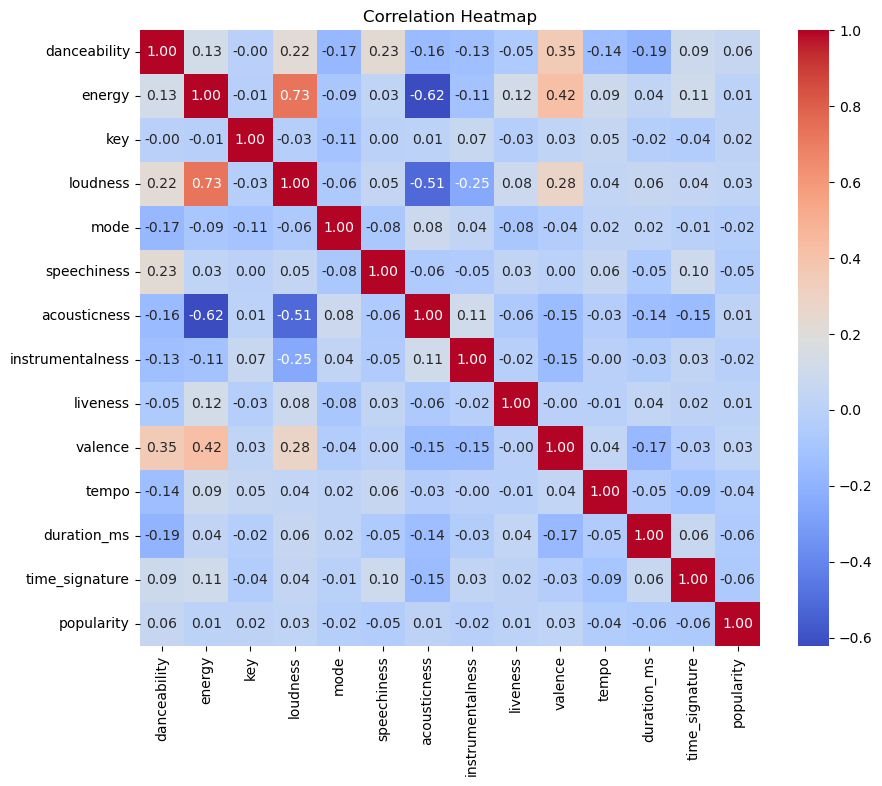

In [56]:
correlation_matrix = data_train.corr()

# Vẽ bản đồ nhiệt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Có thể thấy, một vài cột chỉ số tương quan rất thấp, hầu như không có, có thể bỏ các cột đó nhằm tăng độ tập trung trên data.<br>
Dưới đây sẽ thử drop các cột có độ tương quan <0.2 (trên từng cột)

In [59]:
correlation_matrix = data_train.corr()

# columns_to_drop = set() 
for i in correlation_matrix.columns:
    columns_to_drop = set() 
    for j in correlation_matrix.columns:
        if abs(correlation_matrix[i][j]) < 0.2 and i != j:  
            columns_to_drop.add(j)

    data_filtered = data_train.drop(columns=columns_to_drop)
    
    X_train, X_test, y_train, y_test = train_test_split(data_filtered, label_train, test_size = 0.2, random_state = 18)     
    best_rfc = best_rfc.fit(X_train, y_train)
    predictions = best_rfc.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print("Cột được chọn làm mốc: ", i)
    print("Accuracy của RFC: ", acc)

Cột được chọn làm mốc:  danceability
Accuracy của RFC:  0.51931330472103
Cột được chọn làm mốc:  energy
Accuracy của RFC:  0.45493562231759654
Cột được chọn làm mốc:  key
Accuracy của RFC:  0.45493562231759654
Cột được chọn làm mốc:  loudness
Accuracy của RFC:  0.5021459227467812
Cột được chọn làm mốc:  mode
Accuracy của RFC:  0.45493562231759654
Cột được chọn làm mốc:  speechiness
Accuracy của RFC:  0.4034334763948498
Cột được chọn làm mốc:  acousticness
Accuracy của RFC:  0.4248927038626609
Cột được chọn làm mốc:  instrumentalness
Accuracy của RFC:  0.3905579399141631
Cột được chọn làm mốc:  liveness
Accuracy của RFC:  0.34763948497854075
Cột được chọn làm mốc:  valence
Accuracy của RFC:  0.4978540772532189
Cột được chọn làm mốc:  tempo
Accuracy của RFC:  0.351931330472103
Cột được chọn làm mốc:  duration_ms
Accuracy của RFC:  0.3261802575107296
Cột được chọn làm mốc:  time_signature
Accuracy của RFC:  0.45493562231759654
Cột được chọn làm mốc:  popularity
Accuracy của RFC:  0.454935

Có thể thấy RFC có tăng đáng kể accuracy khi dùng Loudness và Danceability làm mốc, tức là cột này phủ độ tương quan khá tốt với các cột còn lại.<br>
Tiến hành thử trên tỉ lệ thấp hơn là 0.1

In [61]:
correlation_matrix = data_train.corr()

# columns_to_drop = set() 
for i in correlation_matrix.columns:
    columns_to_drop = set() 
    for j in correlation_matrix.columns:
        if abs(correlation_matrix[i][j]) < 0.1 and i != j:  
            columns_to_drop.add(j)

    data_filtered = data_train.drop(columns=columns_to_drop)
    
    X_train, X_test, y_train, y_test = train_test_split(data_filtered, label_train, test_size = 0.2, random_state = 18)     
    best_rfc = best_rfc.fit(X_train, y_train)
    predictions = best_rfc.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print("Cột được chọn làm mốc: ", i)
    print("Accuracy của RFC: ", acc)

Cột được chọn làm mốc:  danceability
Accuracy của RFC:  0.5836909871244635
Cột được chọn làm mốc:  energy
Accuracy của RFC:  0.5150214592274678
Cột được chọn làm mốc:  key
Accuracy của RFC:  0.45493562231759654
Cột được chọn làm mốc:  loudness
Accuracy của RFC:  0.51931330472103
Cột được chọn làm mốc:  mode
Accuracy của RFC:  0.3648068669527897
Cột được chọn làm mốc:  speechiness
Accuracy của RFC:  0.39914163090128757
Cột được chọn làm mốc:  acousticness
Accuracy của RFC:  0.5107296137339056
Cột được chọn làm mốc:  instrumentalness
Accuracy của RFC:  0.5064377682403434
Cột được chọn làm mốc:  liveness
Accuracy của RFC:  0.3905579399141631
Cột được chọn làm mốc:  valence
Accuracy của RFC:  0.5321888412017167
Cột được chọn làm mốc:  tempo
Accuracy của RFC:  0.39914163090128757
Cột được chọn làm mốc:  duration_ms
Accuracy của RFC:  0.48068669527896996
Cột được chọn làm mốc:  time_signature
Accuracy của RFC:  0.44206008583690987
Cột được chọn làm mốc:  popularity
Accuracy của RFC:  0.42489

Độ chính xác cải thiện khá đáng kể trên tỉ lệ drop 0.1 trên cột Danceability, tiến hành thử với Desicion Tree model.

In [62]:
correlation_matrix = data_train.corr()

# columns_to_drop = set() 
for i in correlation_matrix.columns:
    columns_to_drop = set() 
    for j in correlation_matrix.columns:
        if abs(correlation_matrix[i][j]) < 0.1 and i != j:  
            columns_to_drop.add(j)

    data_filtered = data_train.drop(columns=columns_to_drop)
    
    X_train, X_test, y_train, y_test = train_test_split(data_filtered, label_train, test_size = 0.2, random_state = 18)     
    best_dt = best_dt.fit(X_train, y_train)
    predictions = best_dt.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print("Cột được chọn làm mốc: ", i)
    print("Accuracy của RFC: ", acc)

Cột được chọn làm mốc:  danceability
Accuracy của RFC:  0.5064377682403434
Cột được chọn làm mốc:  energy
Accuracy của RFC:  0.4892703862660944
Cột được chọn làm mốc:  key
Accuracy của RFC:  0.45493562231759654
Cột được chọn làm mốc:  loudness
Accuracy của RFC:  0.5021459227467812
Cột được chọn làm mốc:  mode
Accuracy của RFC:  0.4592274678111588
Cột được chọn làm mốc:  speechiness
Accuracy của RFC:  0.48497854077253216
Cột được chọn làm mốc:  acousticness
Accuracy của RFC:  0.5236051502145923
Cột được chọn làm mốc:  instrumentalness
Accuracy của RFC:  0.5021459227467812
Cột được chọn làm mốc:  liveness
Accuracy của RFC:  0.43776824034334766
Cột được chọn làm mốc:  valence
Accuracy của RFC:  0.5236051502145923
Cột được chọn làm mốc:  tempo
Accuracy của RFC:  0.45493562231759654
Cột được chọn làm mốc:  duration_ms
Accuracy của RFC:  0.51931330472103
Cột được chọn làm mốc:  time_signature
Accuracy của RFC:  0.4592274678111588
Cột được chọn làm mốc:  popularity
Accuracy của RFC:  0.454935

Tiến hành thử với SVM model.

In [63]:
correlation_matrix = data_train.corr()

# columns_to_drop = set() 
for i in correlation_matrix.columns:
    columns_to_drop = set() 
    for j in correlation_matrix.columns:
        if abs(correlation_matrix[i][j]) < 0.1 and i != j:  
            columns_to_drop.add(j)

    data_filtered = data_train.drop(columns=columns_to_drop)
    
    X_train, X_test, y_train, y_test = train_test_split(data_filtered, label_train, test_size = 0.2, random_state = 18)     
    best_svm = best_svm.fit(X_train, y_train)
    predictions = best_svm.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print("Cột được chọn làm mốc: ", i)
    print("Accuracy của RFC: ", acc)

Cột được chọn làm mốc:  danceability
Accuracy của RFC:  0.5622317596566524
Cột được chọn làm mốc:  energy
Accuracy của RFC:  0.5021459227467812
Cột được chọn làm mốc:  key
Accuracy của RFC:  0.45493562231759654
Cột được chọn làm mốc:  loudness
Accuracy của RFC:  0.5107296137339056
Cột được chọn làm mốc:  mode
Accuracy của RFC:  0.45493562231759654
Cột được chọn làm mốc:  speechiness
Accuracy của RFC:  0.49356223175965663
Cột được chọn làm mốc:  acousticness
Accuracy của RFC:  0.5364806866952789
Cột được chọn làm mốc:  instrumentalness
Accuracy của RFC:  0.5107296137339056
Cột được chọn làm mốc:  liveness
Accuracy của RFC:  0.45493562231759654
Cột được chọn làm mốc:  valence
Accuracy của RFC:  0.5450643776824035
Cột được chọn làm mốc:  tempo
Accuracy của RFC:  0.45493562231759654
Cột được chọn làm mốc:  duration_ms
Accuracy của RFC:  0.49356223175965663
Cột được chọn làm mốc:  time_signature
Accuracy của RFC:  0.45493562231759654
Cột được chọn làm mốc:  popularity
Accuracy của RFC:  0.4

Có thể thấy thông qua quá trình trên, 0.58 là con số cao nhất đạt được thông qua việc drop feature sử dụng correlation với <b>threshold là 0.1</b> trong model <b>Random Forest</b> và cột mốc là <b>danceability</b>.<br>
Tiến hành thử trên tập test:

In [66]:
correlation_matrix.columns[0]

'danceability'

In [70]:
correlation_matrix = data_test.corr()

# columns_to_drop = set() 
for i in correlation_matrix.columns[0:1]:
    columns_to_drop = set() 
    for j in correlation_matrix.columns:
        if abs(correlation_matrix[i][j]) < 0.1 and i != j:  
            columns_to_drop.add(j)

    data_filtered = data_test.drop(columns=columns_to_drop)
    
    X_train, X_test, y_train, y_test = train_test_split(data_filtered, label_test, test_size = 0.2, random_state = 18)     
    best_rfc = best_rfc.fit(X_train, y_train)
    predictions = best_rfc.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print("Cột được chọn làm mốc: ", i)
    print("Accuracy của RFC: ", acc)
    print(classification_report(y_test, predictions))

Cột được chọn làm mốc:  danceability
Accuracy của RFC:  0.576271186440678
              precision    recall  f1-score   support

     country       1.00      0.50      0.67         2
         pop       0.59      0.77      0.67        30
         r-b       1.00      0.20      0.33         5
         rap       0.62      0.42      0.50        12
        rock       0.40      0.40      0.40        10

    accuracy                           0.58        59
   macro avg       0.72      0.46      0.51        59
weighted avg       0.61      0.58      0.56        59



### Recursive Feature Elimination (RFE)
RFE sử dụng đệ quy để có thể từ từ loại bỏ đi các Feature nhằm gia tăng độ chính xác cho model

### Random Forest Classifier with RFE
Cài đặt:

In [71]:
selector = RFE(best_rfc, n_features_to_select=5, step=1)
selector = selector.fit(data_train, label_train)

Lấy các giá trị được tính toán:

In [72]:
selector.support_

array([ True,  True, False, False, False,  True,  True, False, False,
       False, False,  True, False, False])

Filter data:

In [77]:
dataRFE = data_train[selector.get_feature_names_out()]

Train/test split:

In [78]:
X_train, X_test, y_train, y_test = train_test_split(dataRFE, label_train, test_size = 0.2, random_state=18)

In [80]:
best_rfc = best_rfc.fit(X_train, y_train)
prediction = best_rfc.predict(X_test)
print(accuracy_score(y_test, prediction))

0.5579399141630901


### Random Forest Classifier with DT
Cài đặt:

In [84]:
selector = RFE(best_dt, n_features_to_select=5, step=1)
selector = selector.fit(data_train, label_train)

In [85]:
selector.support_

array([ True,  True, False, False, False,  True, False, False, False,
       False,  True,  True, False, False])

In [86]:
dataRFE = data_train[selector.get_feature_names_out()]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(dataRFE, label_train, test_size = 0.2, random_state=18)

In [88]:
best_dt = best_dt.fit(X_train, y_train)
prediction = best_dt.predict(X_test)
print(accuracy_score(y_test, prediction))

0.5622317596566524


### Random Forest Classifier with SVM
SVM Không được built-in để phục vụ cho việc lấy feature importance nên tạm thời không thể sử dụng!

### RFE Với nhiều multi-drop (3-11)

In [96]:
best_acc = 0
for i in range (3, 12):
    selector = RFE(best_rfc, n_features_to_select=i, step=1)
    selector = selector.fit(data_train, label_train)

    dataRFE = data_train[selector.get_feature_names_out()]
    X_train, X_test, y_train, y_test = train_test_split(dataRFE, label_train, test_size = 0.2, random_state=18)

    best_rfc = best_rfc.fit(X_train, y_train)
    prediction = best_rfc.predict(X_test)
    acc = (accuracy_score(y_test, prediction))

    if acc > best_acc:
        best_acc = acc
        result = "rfc with RFE: acc = {}, num_drop = {}".format(acc, i)

    best_dt = best_dt.fit(X_train, y_train)
    prediction = best_dt.predict(X_test)
    acc = (accuracy_score(y_test, prediction))

    if acc > best_acc:
        best_acc = acc
        result = "dt with RFE: acc = {}, num_drop = {}".format(acc, i)

    print(result)

dt with RFE: acc = 0.5278969957081545, num_drop = 3
dt with RFE: acc = 0.575107296137339, num_drop = 4
dt with RFE: acc = 0.575107296137339, num_drop = 4
dt with RFE: acc = 0.575107296137339, num_drop = 4
rfc with RFE: acc = 0.5836909871244635, num_drop = 7
rfc with RFE: acc = 0.5836909871244635, num_drop = 7
rfc with RFE: acc = 0.5836909871244635, num_drop = 7
rfc with RFE: acc = 0.5836909871244635, num_drop = 7
rfc with RFE: acc = 0.5836909871244635, num_drop = 7


Có thể thấy kết quả cho ra tốt nhất trên model rfc với num_drop = 7!<br>
### Tiến hành thử nghiệm trên tập test:

In [98]:
selector = RFE(best_rfc, n_features_to_select=5, step=1)
selector = selector.fit(data_train, label_train)

dataRFE = data_train[selector.get_feature_names_out()]
best_rfc = best_rfc.fit(dataRFE, label_train)

dataRFE_test = data_test[selector.get_feature_names_out()]
prediction = best_rfc.predict(dataRFE_test)
print(accuracy_score(label_test, prediction))

0.5876288659793815


# Balance Data (Reduce Pop Data to 250)

In [120]:
label.value_counts()

tags
pop        705
rap        270
rock       255
r-b        137
country     86
Name: count, dtype: int64

In [121]:
df_normalized_sample_pop = df_normalized[df_normalized['tags'] == 'pop'].sample(250)
df_normalized_sample_not_pop = df_normalized[df_normalized['tags'] != 'pop']
df_normalized_sampled = pd.concat([df_normalized_sample_pop, df_normalized_sample_not_pop])
df_normalized_sampled.head(4)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,time_signature,popularity,song_name,artist_name,genius_id,lyric,tags,tier,genius_url,released_year
154,0.611722,0.803760,0.818182,0.869724,0.0,0.067570,0.144584,0.642351,0.103521,0.221990,...,0.75,0.15,WHERE SHE GOES,Bad Bunny,9123229,"Baby, dime la verdad Si te olvidaste de mí Yo...",pop,D,https://genius.com/Bad-bunny-where-she-goes-ly...,2023.0
666,0.681319,0.740060,0.090909,0.868795,1.0,0.036776,0.074715,0.001641,0.084285,0.616127,...,0.75,0.75,LALA,Myke Towers,8902658,La-la-la-la-la-la (Full Harmony) La-la-la-la-...,pop,D,https://genius.com/Myke-towers-lala-lyrics,2023.0
724,0.725275,0.793486,0.818182,0.837916,0.0,0.063875,0.003632,0.001459,0.083353,0.881964,...,0.75,0.65,Houdini,Dua Lipa,9712938,Okay (Mmm) I come and I go Tell me all the wa...,pop,B,https://genius.com/Dua-lipa-houdini-lyrics,2023.0
701,0.561661,0.724648,0.090909,0.866677,1.0,0.008446,0.126384,0.000000,0.336675,0.424190,...,0.75,0.00,santa doesn’t know you like i do,Sabrina Carpenter,9666784,Santa Doesn't know you like I do I've been th...,pop,C,https://genius.com/Sabrina-carpenter-santa-doe...,2023.0


In [122]:
df_normalized_sampled.tags.value_counts()

tags
rap        270
rock       255
pop        250
r-b        137
country     86
Name: count, dtype: int64

## Data Normalize

In [123]:
data = df_normalized_sampled.iloc[:,:-8]
label = df_normalized_sampled.tags

In [124]:
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
154,0.611722,0.803760,0.818182,0.869724,0.0,0.067570,0.144584,0.642351,0.103521,0.221990,0.590129,0.313744,0.75,0.15
666,0.681319,0.740060,0.090909,0.868795,1.0,0.036776,0.074715,0.001641,0.084285,0.616127,0.268003,0.252944,0.75,0.75
724,0.725275,0.793486,0.818182,0.837916,0.0,0.063875,0.003632,0.001459,0.083353,0.881964,0.422847,0.231344,0.75,0.65
701,0.561661,0.724648,0.090909,0.866677,1.0,0.008446,0.126384,0.000000,0.336675,0.424190,0.317493,0.238246,0.75,0.00
881,0.603175,0.730813,0.727273,0.805440,1.0,0.021819,0.054897,0.171226,0.160644,0.434454,0.249464,0.173807,0.75,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,0.000000,0.865406,0.363636,0.914053,0.0,0.064755,0.002025,0.196555,0.424108,0.356448,0.754488,0.307342,1.00,0.00
1446,0.655678,0.616768,0.363636,0.825394,1.0,0.010558,0.095140,0.000013,0.077640,0.675658,0.448206,0.350823,0.75,0.00
1447,0.588523,0.777047,0.545455,0.838659,1.0,0.020940,0.062986,0.000000,0.076125,0.479616,0.503667,0.312700,0.75,0.00
1448,0.416361,0.694853,0.000000,0.778054,0.0,0.026395,0.213341,0.000007,0.351830,0.415979,0.255869,0.361549,0.75,0.25


## Train Test Split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, random_state = 18) 

## Pure fit

In [126]:
rfc_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()
svm_model = SVC()

In [127]:
# Pure fit
rfc_model = rfc_model.fit(X_train, y_train)
prediction = rfc_model.predict(X_test)
print(accuracy_score(y_test, prediction))

0.505


In [128]:
# Pure fit
dt_model = dt_model.fit(X_train, y_train)
prediction = dt_model.predict(X_test)
print(accuracy_score(y_test, prediction))

0.4


In [129]:
# Pure fit
svm_model = svm_model.fit(X_train, y_train)
prediction = svm_model.predict(X_test)
print(accuracy_score(y_test, prediction))

0.45


## GridSearchCV

Sử dụng best model được lưu ở trên.

In [130]:
best_rfc = RandomForestClassifier(bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
best_dt = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=2, min_samples_split=10)
best_svm = SVC(C=1, gamma='scale', kernel='poly')

### Predict

In [131]:
# Pure fit
best_rfc = best_rfc.fit(X_train, y_train)
prediction = best_rfc.predict(X_test)
print(accuracy_score(y_test, prediction))

0.465


In [132]:
# Pure fit
best_dt = best_dt.fit(X_train, y_train)
prediction = best_dt.predict(X_test)
print(accuracy_score(y_test, prediction))

0.405


In [133]:
# Pure fit
best_svm = best_svm.fit(X_train, y_train)
prediction = best_svm.predict(X_test)
print(accuracy_score(y_test, prediction))

0.47


### Thử nghiệm với model improvement!

In [134]:
acc_best = 0
best_model = ''
for i in range(3,12):
    X_with_selectKBest = SelectKBest(chi2, k=i).fit_transform(data, label)
    X_train, X_test, y_train, y_test = train_test_split(X_with_selectKBest, label, test_size = 0.2, random_state = 18) 
    
    best_rfc = best_rfc.fit(X_train, y_train)
    predictions = best_rfc.predict(X_test)
    acc = accuracy_score(y_test, predictions)

    if acc > acc_best:
        acc_best = acc
        best_model = "rfc with k = {}, accuracy = {}".format(i, acc)

    best_dt = best_dt.fit(X_train, y_train)
    predictions = best_dt.predict(X_test)
    acc = accuracy_score(y_test, predictions)

    if acc > acc_best:
        acc_best = acc
        best_model = "dt with k = {}, accuracy = {}".format(i, acc)

    best_svm = best_svm.fit(X_train, y_train)
    predictions = best_svm.predict(X_test)
    acc = accuracy_score(y_test, predictions)

    if acc > acc_best:
        acc_best = acc
        best_model = "svm with k = {}, accuracy = {}".format(i, acc)

    print(best_model)

svm with k = 3, accuracy = 0.44
svm with k = 3, accuracy = 0.44
svm with k = 3, accuracy = 0.44
svm with k = 6, accuracy = 0.46
rfc with k = 7, accuracy = 0.465
rfc with k = 8, accuracy = 0.505
rfc with k = 8, accuracy = 0.505
rfc with k = 8, accuracy = 0.505
rfc with k = 8, accuracy = 0.505


### Thử nghiệm với drop feature sử dụng correlation

In [135]:
correlation_matrix = data.corr()

# columns_to_drop = set() 
for i in correlation_matrix.columns:
    columns_to_drop = set() 
    for j in correlation_matrix.columns:
        if abs(correlation_matrix[i][j]) < 0.2 and i != j:  
            columns_to_drop.add(j)

    data_filtered = data.drop(columns=columns_to_drop)
    
    X_train, X_test, y_train, y_test = train_test_split(data_filtered, label, test_size = 0.2, random_state = 18)     
    best_rfc = best_rfc.fit(X_train, y_train)
    predictions = best_rfc.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print("Cột được chọn làm mốc: ", i)
    print("Accuracy của RFC: ", acc)
    

Cột được chọn làm mốc:  danceability
Accuracy của RFC:  0.42
Cột được chọn làm mốc:  energy
Accuracy của RFC:  0.36
Cột được chọn làm mốc:  key
Accuracy của RFC:  0.265
Cột được chọn làm mốc:  loudness
Accuracy của RFC:  0.395
Cột được chọn làm mốc:  mode
Accuracy của RFC:  0.275
Cột được chọn làm mốc:  speechiness
Accuracy của RFC:  0.36
Cột được chọn làm mốc:  acousticness
Accuracy của RFC:  0.31
Cột được chọn làm mốc:  instrumentalness
Accuracy của RFC:  0.235
Cột được chọn làm mốc:  liveness
Accuracy của RFC:  0.19
Cột được chọn làm mốc:  valence
Accuracy của RFC:  0.39
Cột được chọn làm mốc:  tempo
Accuracy của RFC:  0.255
Cột được chọn làm mốc:  duration_ms
Accuracy của RFC:  0.375
Cột được chọn làm mốc:  time_signature
Accuracy của RFC:  0.285
Cột được chọn làm mốc:  popularity
Accuracy của RFC:  0.215


Có thể thấy khi giảm data đi thì độ chính xác giảm rất sâu. Có thể đoán được rằng hiệu năng sẽ cải thiện nếu như có thêm data của các label khác, hạn chế việc balance data bằng việc cắt bớt đi dữ liệu.